In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

import json
import pandas as pd

with open("D:\\MS\\Indiana University Bloomington\\Classes\\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\\Client Project\\venues.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Standardize country names
def get_country_name(country):
    if not country:
        return None
    country = country.strip()
    corrections = {
        "The Netherlands": "Netherlands",
        "UK": "United Kingdom",
        "USA": "United States",
        "UsA": "United States",
        "US": "United States",
        "England": "United Kingdom",
        "Korea": "South Korea",  
        "Columbia": "Colombia",
        "GA": None
    }
    return corrections.get(country, country)

# US States Mapping
us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}

# Standardize state names 
def get_state_name(state, country):
    if not state:
        return None
    state = state.strip()
    state_corrections = {
        "DC": "District of Columbia",
        "Québec": "Quebec",
        "DE": "Delaware" if country == "United States" else None
    }
    if state in state_corrections:
        return state_corrections[state]
    if country == "United States" and state in us_states:
        return us_states[state]
    
    invalid_states = ["Canada", "UK", "PT", "(virtual)", "Vienna", "Berlin", "Tokyo", "Maastricht", "Dresden", "Budapest"]
    if state in invalid_states:
        return None  

    return state

# Manual City Corrections
city_corrections = {
    "Bogata": "Bogotá",
    "Duisberg": "Duisburg",
    "València": "Valencia",
    "Québec City": "Quebec City",
    "Den Haag": "The Hague",
    "Frankfurt am Main": "Frankfurt",
    "Bad Neuenahr-Ahrweiler": "Bad Neuenahr",
    "Davos-Klosters": "Davos",
    "Washington, CS": "Washington, DC",
    "Minato": "Tokyo", 
    "Valley of Mexico": "Mexico City",
    "Bloomginton": "Bloomington" 
}

# Standardize city names 
def correct_city_name(city):
    if not city:
        return None
    city = city.strip()
    
    # Apply manual corrections only
    return city_corrections.get(city, city)

cleaned_data = []

for entry in data:
    start_date = entry.get("dateStart", "").strip()
    end_date = entry.get("dateEnd", "").strip()

    title = (entry.get("title") or "").strip()
    venue = (entry.get("venue") or "").strip()
    if not venue or venue == title:
        venue = title

    city = correct_city_name((entry.get("city") or "").strip())
    country = get_country_name((entry.get("country") or "").strip())
    state = get_state_name((entry.get("state") or "").strip(), country)

    if state in ["Ottignies-Louvain-la-Neuve", "Aarhus", "Minato", "Vienna", 
                 "Valley of Mexico", "Tokyo", "Maastricht", "Dresden", "Berlin", "Budapest"]:
        city = state  
        state = None  

    if city in ["COSMO", "SBHD", "Semmelweis", "NetSci", "NISTEP", "Complexity Science Hub"]:
        venue = city  
        city = None  

    organizer = (entry.get("organizer") or "").strip()
    pdf_link = entry.get("pdfLink", "").strip() if entry.get("pdfLink") else None

    cleaned_data.append({
        "Start Date": start_date,
        "End Date": end_date,
        "Title": title,
        "Venue": venue,
        "City": city,
        "State": state,
        "Country": country,
        "Organizer": organizer,
        "PDF Link": pdf_link
    })

# Convert to DataFrame 
df = pd.DataFrame(cleaned_data)

df.drop_duplicates(subset=["Start Date", "End Date", "Title", "Venue", "City", "State", "Country"], keep="first", inplace=True)

In [2]:
print("Unique city names:")
print(df["City"].unique())

Unique city names:
['Denver' 'Leiden' 'Bloomington' 'Trieste' 'Urbana-Champaign' 'Santa Fe'
 'San Diego' 'London' 'Los Alamos' 'Stockholm' 'Redlands' 'Frankfurt'
 'Washington, DC' 'Indianapolis' 'Pasadena' 'Tokyo' 'Philadelphia'
 'Queens' 'New York City' 'Atlanta' 'Amsterdam' 'Palisades' 'Boston'
 'Helsinki' 'Cold Spring Harbor' 'Oak Ridge' 'San Jose' 'Mountain View'
 'Chicago' 'San Francisco' 'Madrid' 'Zurich' 'Gaithersburg' 'Ann Arbor'
 'Montréal' 'Edmonton' 'Bad Honnef' 'The Hague' 'St. Pete Beach' 'Beijing'
 'La Jolla' 'Ottawa' 'Rotterdam' 'Lanzhou' 'Chengdu' 'Waterloo'
 'Arlington' 'Vienna' 'Oracle' 'Bethesda' 'Wuhan' 'Ithaca' 'Paris'
 'Stanford' 'Bonn' None 'Osaka' 'New York' 'Binghamton' 'Dresden' 'Venice'
 'Rio de Janeiro' 'Oxford' 'Arteleku' 'Budapest' 'Guildford' 'Greensboro'
 'Linz' 'Gainesville' 'Los Angeles' 'Leipzig' 'Regensburg' 'Bordeaux'
 'Brisbane' 'Acquafredda di Maratea' 'Dublin' 'Bristol' 'Seattle'
 'Washington' 'Torun' 'Cracow' 'Eindhoven' 'Charlotte' 'Naples' 'Du

In [3]:
print("Unique state names:")
print(df["State"].unique())

Unique state names:
['Colorado' None 'Indiana' 'Illinois' 'New Mexico' 'California'
 'Pennsylvania' 'New York' 'Georgia' 'Massachusetts' 'Tennessee'
 'Maryland' 'Michigan' 'Quebec' 'Alberta' 'Florida' 'Ontario' 'Virginia'
 'Arizona' 'North Carolina' 'Washington' 'District of Columbia'
 'Rhode Island' 'Ohio' 'Texas' 'Oregon' 'Connecticut' 'Minnesota'
 'Louisiana' 'Missouri' 'New Jersey' 'Nova Scotia' 'Utah' 'Iowa' 'Maine']


In [4]:
print("Unique country names:")
print(df["Country"].unique())

Unique country names:
['United States' 'Netherlands' 'Italy' 'United Kingdom' 'Sweden' 'Germany'
 'Finland' 'Japan' 'Spain' 'Switzerland' 'Canada' 'China' 'Austria'
 'France' 'Brazil' 'Hungary' 'Australia' 'Ireland' 'Poland' 'South Africa'
 'Turkey' None 'Belgium' 'Chile' 'Israel' 'Denmark' 'South Korea' 'Mexico'
 'India' 'Colombia' 'Luxembourg' 'Portugal']


In [5]:
print(df[df["Title"].isna()])
print(df[df["Venue"].isna()])

Empty DataFrame
Columns: [Start Date, End Date, Title, Venue, City, State, Country, Organizer, PDF Link]
Index: []
Empty DataFrame
Columns: [Start Date, End Date, Title, Venue, City, State, Country, Organizer, PDF Link]
Index: []


In [6]:
print(df[df["Venue"] == df["Title"]])

                   Start Date                  End Date  \
0    2005-04-05T00:00:00.000Z  2005-04-09T00:00:00.000Z   
5    2005-05-25T00:00:00.000Z  2005-05-26T00:00:00.000Z   
7    2005-07-06T00:00:00.000Z  2005-07-08T00:00:00.000Z   
8    2005-07-10T00:00:00.000Z  2005-07-20T00:00:00.000Z   
11   2005-07-30T00:00:00.000Z  2005-08-15T00:00:00.000Z   
..                        ...                       ...   
447  2022-06-22T20:45:12.045Z  2022-06-22T20:45:12.052Z   
453  2022-10-22T14:00:09.294Z  2022-10-22T21:00:09.299Z   
456  2022-12-10T15:00:00.000Z  2022-12-11T15:00:00.000Z   
465  2024-06-06T16:00:36.046Z  2024-11-03T21:00:36.060Z   
467  2022-01-01T17:00:00.033Z  2023-12-31T17:00:00.046Z   

                                                 Title  \
0    101st Annual Meeting of the Association of Ame...   
5    Sixth Annual Alliance for Innovation in Scienc...   
7                 Information Visualization Conference   
8                       Los Alamos National Laboratory   
1

In [7]:
df["Start Date"] = pd.to_datetime(df["Start Date"], errors="coerce").dt.date
df["End Date"] = pd.to_datetime(df["End Date"], errors="coerce").dt.date
df["End Date"] = df["End Date"].where(df["End Date"] >= df["Start Date"], df["Start Date"])
df["Event Duration (Days)"] = (pd.to_datetime(df["End Date"]) - pd.to_datetime(df["Start Date"])).dt.days + 1

In [8]:
df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days)
0,2005-04-05,2005-04-09,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",None,5
1,2005-04-07,2005-04-11,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,None,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5
2,2005-04-25,2005-04-25,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,None,1
3,2005-05-15,2005-05-27,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,None,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13
4,2005-05-17,2005-05-20,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,None,4
...,...,...,...,...,...,...,...,...,...,...
482,2025-04-01,2025-04-30,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,None,30
483,2025-04-03,2025-04-03,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,None,1
484,2025-05-18,2025-08-08,Places & Spaces: Mapping Science,COSMO,None,None,Germany,Jörg Neumann,None,83
485,2025-06-16,2025-06-18,Systems Biology of Human Disease,SBHD,None,None,Germany,Franziska Gudrun Muller,None,3


In [9]:
df.to_excel(r"D:\MS\Indiana University Bloomington\Classes\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\Client Project\Week 3\cleaned_venues.xlsx", index=False, engine='openpyxl')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Start Date             487 non-null    object
 1   End Date               487 non-null    object
 2   Title                  487 non-null    object
 3   Venue                  487 non-null    object
 4   City                   475 non-null    object
 5   State                  286 non-null    object
 6   Country                483 non-null    object
 7   Organizer              487 non-null    object
 8   PDF Link               161 non-null    object
 9   Event Duration (Days)  487 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 38.2+ KB


In [11]:
df.isnull().sum()

Start Date                 0
End Date                   0
Title                      0
Venue                      0
City                      12
State                    201
Country                    4
Organizer                  0
PDF Link                 326
Event Duration (Days)      0
dtype: int64

In [12]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import time

geolocator = Nominatim(user_agent="geo_finder")

location_cache = {}

def get_coordinates(city, state, country):
    key = (city, state, country)

    if key in location_cache:
        return location_cache[key]

    try:
        # City + State + Country
        if pd.notna(city) and pd.notna(state) and pd.notna(country):
            location = geolocator.geocode(f"{city}, {state}, {country}", timeout=10)
            if location:
                location_cache[key] = (location.latitude, location.longitude, "City+State+Country")
                return location_cache[key]

        # City + Country
        if pd.notna(city) and pd.notna(country):
            location = geolocator.geocode(f"{city}, {country}", timeout=10)
            if location:
                location_cache[key] = (location.latitude, location.longitude, "City+Country")
                return location_cache[key]

        # State + Country
        if pd.notna(state) and pd.notna(country):
            location = geolocator.geocode(f"{state}, {country}", timeout=10)
            if location:
                location_cache[key] = (location.latitude, location.longitude, "State+Country")
                return location_cache[key]

        # Only Country
        if pd.notna(country):
            location = geolocator.geocode(country, timeout=10)
            if location:
                location_cache[key] = (location.latitude, location.longitude, "Country")
                return location_cache[key]

    except GeocoderTimedOut:
        time.sleep(1) 
        return get_coordinates(city, state, country)

    location_cache[key] = (None, None, "Not Found")
    return location_cache[key]

df[["Latitude", "Longitude", "Location Type"]] = df.apply(
    lambda row: get_coordinates(row["City"], row["State"], row["Country"]), axis=1, result_type="expand"
)

In [13]:
df.to_excel(r"D:\MS\Indiana University Bloomington\Classes\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\Client Project\Week 3\geocoded_output.xlsx", index=False, engine='openpyxl')

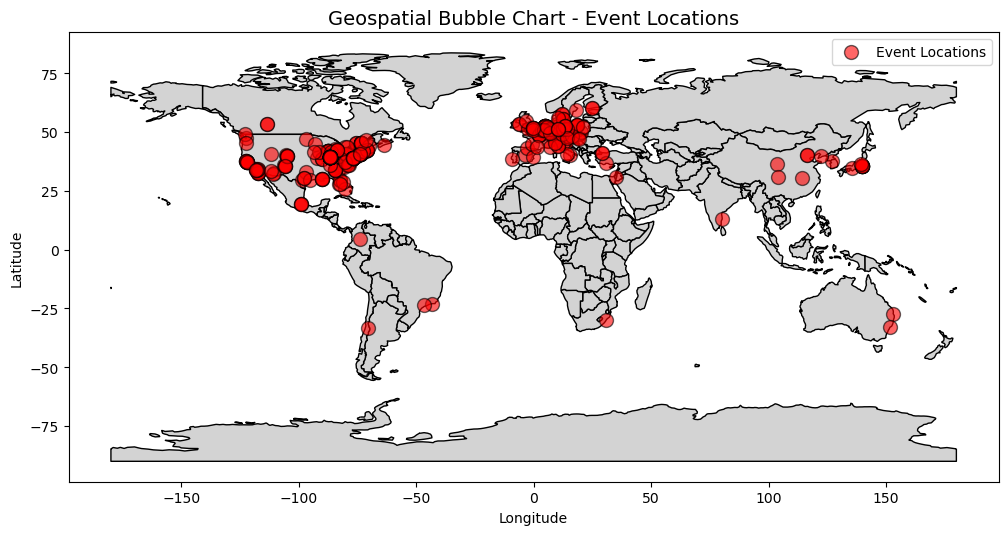

In [14]:
# Bubble chart using Latitude and Longitude

import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

fig, ax = plt.subplots(figsize=(12, 8))

world.plot(ax=ax, color="lightgray", edgecolor="black")

scatter = ax.scatter(
    df["Longitude"], df["Latitude"], 
    s=100, c="red", alpha=0.6, edgecolors="black", label="Event Locations"
)

plt.title("Geospatial Bubble Chart - Event Locations", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.show()

In [15]:
df = df.copy()
df["Start Date"] = pd.to_datetime(df["Start Date"], errors='coerce')
df["Year Started"] = df["Start Date"].dt.year

In [16]:
df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days),Latitude,Longitude,Location Type,Year Started
0,2005-04-05,2005-04-09,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",None,5,39.739236,-104.984862,City+State+Country,2005
1,2005-04-07,2005-04-11,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,None,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5,52.159475,4.490884,City+Country,2005
2,2005-04-25,2005-04-25,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,None,1,39.167040,-86.534288,City+State+Country,2005
3,2005-05-15,2005-05-27,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,None,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13,45.649648,13.777278,City+Country,2005
4,2005-05-17,2005-05-20,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,None,4,40.076154,-88.223313,City+State+Country,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2025-04-01,2025-04-30,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,None,30,39.167040,-86.534288,City+State+Country,2025
483,2025-04-03,2025-04-03,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,None,1,39.167040,-86.534288,City+State+Country,2025
484,2025-05-18,2025-08-08,Places & Spaces: Mapping Science,COSMO,None,None,Germany,Jörg Neumann,None,83,51.163818,10.447831,Country,2025
485,2025-06-16,2025-06-18,Systems Biology of Human Disease,SBHD,None,None,Germany,Franziska Gudrun Muller,None,3,51.163818,10.447831,Country,2025


In [17]:
def generate_unique_id(series):
    ids = pd.factorize(series)[0] + 1  
    return pd.Series(ids, index=series.index, dtype="Int64")  

df = df.copy()

df.loc[:, "CountryID"] = generate_unique_id(df["Country"])
df.loc[:, "StateID"] = generate_unique_id(df["State"])
df.loc[:, "CityID"] = generate_unique_id(df["City"])

df.loc[df["Country"].isna(), "CountryID"] = None
df.loc[df["State"].isna(), "StateID"] = None
df.loc[df["City"].isna(), "CityID"] = None

In [18]:
df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days),Latitude,Longitude,Location Type,Year Started,CountryID,StateID,CityID
0,2005-04-05,2005-04-09,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",None,5,39.739236,-104.984862,City+State+Country,2005,1,1,1
1,2005-04-07,2005-04-11,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,None,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5,52.159475,4.490884,City+Country,2005,2,<NA>,2
2,2005-04-25,2005-04-25,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,None,1,39.167040,-86.534288,City+State+Country,2005,1,2,3
3,2005-05-15,2005-05-27,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,None,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13,45.649648,13.777278,City+Country,2005,3,<NA>,4
4,2005-05-17,2005-05-20,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,None,4,40.076154,-88.223313,City+State+Country,2005,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2025-04-01,2025-04-30,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,None,30,39.167040,-86.534288,City+State+Country,2025,1,2,3
483,2025-04-03,2025-04-03,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,None,1,39.167040,-86.534288,City+State+Country,2025,1,2,3
484,2025-05-18,2025-08-08,Places & Spaces: Mapping Science,COSMO,None,None,Germany,Jörg Neumann,None,83,51.163818,10.447831,Country,2025,6,<NA>,<NA>
485,2025-06-16,2025-06-18,Systems Biology of Human Disease,SBHD,None,None,Germany,Franziska Gudrun Muller,None,3,51.163818,10.447831,Country,2025,6,<NA>,<NA>


In [19]:
df = df.dropna(subset=["Latitude", "Longitude"])

In [20]:
df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days),Latitude,Longitude,Location Type,Year Started,CountryID,StateID,CityID
0,2005-04-05,2005-04-09,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",None,5,39.739236,-104.984862,City+State+Country,2005,1,1,1
1,2005-04-07,2005-04-11,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,None,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5,52.159475,4.490884,City+Country,2005,2,<NA>,2
2,2005-04-25,2005-04-25,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,None,1,39.167040,-86.534288,City+State+Country,2005,1,2,3
3,2005-05-15,2005-05-27,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,None,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13,45.649648,13.777278,City+Country,2005,3,<NA>,4
4,2005-05-17,2005-05-20,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,None,4,40.076154,-88.223313,City+State+Country,2005,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2025-04-01,2025-04-30,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,None,30,39.167040,-86.534288,City+State+Country,2025,1,2,3
483,2025-04-03,2025-04-03,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,None,1,39.167040,-86.534288,City+State+Country,2025,1,2,3
484,2025-05-18,2025-08-08,Places & Spaces: Mapping Science,COSMO,None,None,Germany,Jörg Neumann,None,83,51.163818,10.447831,Country,2025,6,<NA>,<NA>
485,2025-06-16,2025-06-18,Systems Biology of Human Disease,SBHD,None,None,Germany,Franziska Gudrun Muller,None,3,51.163818,10.447831,Country,2025,6,<NA>,<NA>


In [21]:
df.isnull().sum()

Start Date                 0
End Date                   0
Title                      0
Venue                      0
City                      10
State                    197
Country                    0
Organizer                  0
PDF Link                 323
Event Duration (Days)      0
Latitude                   0
Longitude                  0
Location Type              0
Year Started               0
CountryID                  0
StateID                  197
CityID                    10
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 486
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Start Date             483 non-null    datetime64[ns]
 1   End Date               483 non-null    object        
 2   Title                  483 non-null    object        
 3   Venue                  483 non-null    object        
 4   City                   473 non-null    object        
 5   State                  286 non-null    object        
 6   Country                483 non-null    object        
 7   Organizer              483 non-null    object        
 8   PDF Link               160 non-null    object        
 9   Event Duration (Days)  483 non-null    int64         
 10  Latitude               483 non-null    float64       
 11  Longitude              483 non-null    float64       
 12  Location Type          483 non-null    object        
 13  Year Start

In [23]:
def get_day_with_suffix(day):
    if 11 <= day <= 13:
        return f"{day}th"
    last_digit = day % 10
    if last_digit == 1:
        return f"{day}st"
    elif last_digit == 2:
        return f"{day}nd"
    elif last_digit == 3:
        return f"{day}rd"
    else:
        return f"{day}th"

def format_date(date_obj):
    if pd.isna(date_obj):
        return "Unknown"
    day = get_day_with_suffix(date_obj.day)
    return f"{day} {date_obj.strftime('%B %Y')}"

df["Start Date (String)"] = df["Start Date"].apply(format_date)
df["End Date (String)"] = df["End Date"].apply(format_date)

In [24]:
df["End Date"] = pd.to_datetime(df["End Date"], errors='coerce')
df["Start Date"] = pd.to_datetime(df["Start Date"], errors='coerce') 

df["Month Started"] = df["Start Date"].dt.month
df["Month Ended"] = df["End Date"].dt.month

df["Month Started (String)"] = df["Start Date"].dt.strftime('%B')
df["Month Ended (String)"] = df["End Date"].dt.strftime('%B')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 486
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Start Date              483 non-null    datetime64[ns]
 1   End Date                483 non-null    datetime64[ns]
 2   Title                   483 non-null    object        
 3   Venue                   483 non-null    object        
 4   City                    473 non-null    object        
 5   State                   286 non-null    object        
 6   Country                 483 non-null    object        
 7   Organizer               483 non-null    object        
 8   PDF Link                160 non-null    object        
 9   Event Duration (Days)   483 non-null    int64         
 10  Latitude                483 non-null    float64       
 11  Longitude               483 non-null    float64       
 12  Location Type           483 non-null    object        


In [26]:
df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days),...,Year Started,CountryID,StateID,CityID,Start Date (String),End Date (String),Month Started,Month Ended,Month Started (String),Month Ended (String)
0,2005-04-05,2005-04-09,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",None,5,...,2005,1,1,1,5th April 2005,9th April 2005,4,4,April,April
1,2005-04-07,2005-04-11,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,None,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5,...,2005,2,<NA>,2,7th April 2005,11th April 2005,4,4,April,April
2,2005-04-25,2005-04-25,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,None,1,...,2005,1,2,3,25th April 2005,25th April 2005,4,4,April,April
3,2005-05-15,2005-05-27,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,None,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13,...,2005,3,<NA>,4,15th May 2005,27th May 2005,5,5,May,May
4,2005-05-17,2005-05-20,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,None,4,...,2005,1,3,5,17th May 2005,20th May 2005,5,5,May,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2025-04-01,2025-04-30,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,None,30,...,2025,1,2,3,1st April 2025,30th April 2025,4,4,April,April
483,2025-04-03,2025-04-03,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,None,1,...,2025,1,2,3,3rd April 2025,3rd April 2025,4,4,April,April
484,2025-05-18,2025-08-08,Places & Spaces: Mapping Science,COSMO,None,None,Germany,Jörg Neumann,None,83,...,2025,6,<NA>,<NA>,18th May 2025,8th August 2025,5,8,May,August
485,2025-06-16,2025-06-18,Systems Biology of Human Disease,SBHD,None,None,Germany,Franziska Gudrun Muller,None,3,...,2025,6,<NA>,<NA>,16th June 2025,18th June 2025,6,6,June,June


In [27]:
df.to_excel(r"D:\MS\Indiana University Bloomington\Classes\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\Client Project\Week 3\final_output.xlsx", index=False, engine='openpyxl')

In [28]:
# Global Exhibit Venues (Folium)

import folium
from folium.plugins import MarkerCluster
import branca

df["Start Date"] = pd.to_datetime(df["Start Date"], errors="coerce")
df["End Date"] = pd.to_datetime(df["End Date"], errors="coerce")

map_center = [df["Latitude"].median(), df["Longitude"].median()]
m = folium.Map(location=map_center, zoom_start=2)

marker_cluster = MarkerCluster().add_to(m)

timeline = branca.element.Figure()
timeline.add_child(m)

for _, row in df.iterrows():
    location = (row["Latitude"], row["Longitude"])
    
    popup_text = f"""
    <b>Title:</b> {row['Title']}<br>
    <b>Venue:</b> {row['Venue'] if pd.notna(row['Venue']) else 'N/A'}<br>
    <b>Start Date:</b> {row['Start Date'].strftime('%Y-%m-%d') if pd.notna(row['Start Date']) else 'Unknown'}<br>
    <b>End Date:</b> {row['End Date'].strftime('%Y-%m-%d') if pd.notna(row['End Date']) else 'Unknown'}<br>
    <b>Country:</b> {row['Country'] if pd.notna(row['Country']) else 'N/A'}<br>
    <b>State:</b> {row['State'] if pd.notna(row['State']) else 'N/A'}<br>
    <b>City:</b> {row['City'] if pd.notna(row['City']) else 'N/A'}<br>
    <b>Organizer:</b> {row['Organizer'] if pd.notna(row['Organizer']) else 'N/A'}<br>
    <b>Event Duration (Days):</b> {row['Event Duration (Days)']} <br>
    """
    
    folium.Marker(
        location, 
        popup=folium.Popup(popup_text, max_width=400), 
        tooltip=f"{row['Title']} ({row['Year Started']})"
    ).add_to(marker_cluster)

m.save("Global Exhibit Venues (Folium).html")

In [57]:
df.describe()

,Start Date,End Date,Event Duration (Days),Latitude,Longitude,Year Started,CountryID,StateID,CityID,Month Started,Month Ended
count,483,483,483.000000,483.000000,483.000000,483.000000,483.0,286.0,473.0,483.000000,483.000000
mean,2013-08-30 09:44:20.869565440,2013-11-30 10:38:00.745341440,93.037267,40.672281,-52.712664,2013.140787,4.393375,7.265734,46.289641,6.844720,7.163561
min,2005-04-05 00:00:00,2005-04-09 00:00:00,1.000000,-33.437776,-123.113952,2005.000000,1.0,1.0,1.0,1.000000,1.000000
25%,2009-07-14 00:00:00,2009-07-24 00:00:00,1.000000,38.895037,-86.534288,2009.000000,1.0,2.0,3.0,4.000000,4.000000
50%,2013-09-27 00:00:00,2013-09-27 00:00:00,2.000000,39.167040,-77.123359,2013.000000,1.0,3.0,26.0,7.000000,7.000000
75%,2016-07-05 00:00:00,2016-08-14 12:00:00,5.000000,45.503182,2.705960,2016.000000,6.0,10.0,74.0,10.000000,10.000000
max,2025-07-28 00:00:00,2120-01-01 00:00:00,35794.000000,60.204965,153.023499,2025.000000,31.0,34.0,171.0,12.000000,12.000000
std,NaN,NaN,1629.064372,10.271218,58.189847,5.070136,6.342123,7.815819,48.278266,3.386988,3.447315


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 486
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Start Date              483 non-null    datetime64[ns]
 1   End Date                483 non-null    datetime64[ns]
 2   Title                   483 non-null    object        
 3   Venue                   483 non-null    object        
 4   City                    473 non-null    object        
 5   State                   286 non-null    object        
 6   Country                 483 non-null    object        
 7   Organizer               483 non-null    object        
 8   PDF Link                160 non-null    object        
 9   Event Duration (Days)   483 non-null    int64         
 10  Latitude                483 non-null    float64       
 11  Longitude               483 non-null    float64       
 12  Location Type           483 non-null    object        


In [9]:
# Updating Outlier Entry (Permanent Map Installation - Berlin)
import pandas as pd
final_df = pd.read_csv(r"D:\MS\Indiana University Bloomington\Classes\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\Client Project\Week 3\final_output.csv")

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Start Date              483 non-null    object 
 1   End Date                483 non-null    object 
 2   Title                   483 non-null    object 
 3   Venue                   483 non-null    object 
 4   City                    473 non-null    object 
 5   State                   286 non-null    object 
 6   Country                 483 non-null    object 
 7   Organizer               373 non-null    object 
 8   PDF Link                160 non-null    object 
 9   Event Duration (Days)   483 non-null    int64  
 10  Latitude                483 non-null    float64
 11  Longitude               483 non-null    float64
 12  Location Type           483 non-null    object 
 13  Year Started            483 non-null    int64  
 14  CountryID               483 non-null    in

In [13]:
final_df

,Start Date,End Date,Title,Venue,City,State,Country,Organizer,PDF Link,Event Duration (Days),...,Year Started,CountryID,StateID,CityID,Start Date (String),End Date (String),Month Started,Month Ended,Month Started (String),Month Ended (String)
0,2005-04-05 00:00:00,2005-04-09 00:00:00,101st Annual Meeting of the Association of Ame...,101st Annual Meeting of the Association of Ame...,Denver,Colorado,United States,"Deborah MacPherson, Katy Börner",NaN,5,...,2005,1,1.0,1.0,5th April 2005,9th April 2005,4,4,April,April
1,2005-04-07 00:00:00,2005-04-11 00:00:00,Simulating the Social Processes of Science,Lorentz Workshop,Leiden,NaN,Netherlands,Andrea Scharnhorst,20050407-simulating-social-science.pdf,5,...,2005,2,NaN,2.0,7th April 2005,11th April 2005,4,4,April,April
2,2005-04-25 00:00:00,2005-04-25 00:00:00,Networks and Complex Systems Talk Series,"SLIS, Indiana University",Bloomington,Indiana,United States,Peter A. Hook,NaN,1,...,2005,1,2.0,3.0,25th April 2005,25th April 2005,4,4,April,April
3,2005-05-15 00:00:00,2005-05-27 00:00:00,School and Workshop on Structure and Function ...,Abdus Salam International Centre for Theoretic...,Trieste,NaN,Italy,Katy Börner,20050515-school-workshop-structure.pdf,13,...,2005,3,NaN,4.0,15th May 2005,27th May 2005,5,5,May,May
4,2005-05-17 00:00:00,2005-05-20 00:00:00,Understanding Complex Systems 2004 Symposium,University of Illinois,Urbana-Champaign,Illinois,United States,Peter A. Hook,NaN,4,...,2005,1,3.0,5.0,17th May 2005,20th May 2005,5,5,May,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2025-04-01 00:00:00,2025-04-30 00:00:00,Places & Spaces: Mapping Science,City of Bloomington,Bloomington,Indiana,United States,Aubrey Seader,NaN,30,...,2025,1,2.0,3.0,1st April 2025,30th April 2025,4,4,April,April
479,2025-04-03 00:00:00,2025-04-03 00:00:00,First Thursdays Festival,Arts Plaza,Bloomington,Indiana,United States,Arts and Humanities Council,NaN,1,...,2025,1,2.0,3.0,3rd April 2025,3rd April 2025,4,4,April,April
480,2025-05-18 00:00:00,2025-08-08 00:00:00,Places & Spaces: Mapping Science,COSMO,NaN,NaN,Germany,Jörg Neumann,NaN,83,...,2025,6,NaN,NaN,18th May 2025,8th August 2025,5,8,May,August
481,2025-06-16 00:00:00,2025-06-18 00:00:00,Systems Biology of Human Disease,SBHD,NaN,NaN,Germany,Franziska Gudrun Muller,NaN,3,...,2025,6,NaN,NaN,16th June 2025,18th June 2025,6,6,June,June


In [21]:
print(final_df.iloc[439])

Start Date                       2022-01-01 00:00:00
End Date                         2120-01-01 00:00:00
Title                     Permanent Map Installation
Venue                                           DZHW
City                                          Berlin
State                                            NaN
Country                                      Germany
Organizer                                Katy Börner
PDF Link                                         NaN
Event Duration (Days)                          35794
Latitude                                   52.510885
Longitude                                  13.398937
Location Type                           City+Country
Year Started                                    2022
CountryID                                          6
StateID                                          NaN
CityID                                         167.0
Start Date (String)                 1st January 2022
End Date (String)                   1st Januar

In [25]:
from datetime import datetime
idx = 439
new_end_date = datetime(2024, 1, 1)
final_df.at[idx, 'End Date'] = new_end_date
final_df.at[idx, 'End Date (String)'] = '1st January 2024'
start_date_raw = final_df.at[idx, 'Start Date']
start_date = pd.to_datetime(start_date_raw)
duration_days = (new_end_date - start_date).days
final_df.at[idx, 'Event Duration (Days)'] = duration_days
final_df.at[idx, 'Month Ended'] = new_end_date.month
final_df.at[idx, 'Month Ended (String)'] = new_end_date.strftime('%B')
print(final_df.iloc[idx])

Start Date                       2022-01-01 00:00:00
End Date                         2024-01-01 00:00:00
Title                     Permanent Map Installation
Venue                                           DZHW
City                                          Berlin
State                                            NaN
Country                                      Germany
Organizer                                Katy Börner
PDF Link                                         NaN
Event Duration (Days)                            730
Latitude                                   52.510885
Longitude                                  13.398937
Location Type                           City+Country
Year Started                                    2022
CountryID                                          6
StateID                                          NaN
CityID                                         167.0
Start Date (String)                 1st January 2022
End Date (String)                   1st Januar

In [27]:
final_df.to_excel(r"D:\MS\Indiana University Bloomington\Classes\ENGR-E 583 Information Visualization (Dr. Katy Börner & Michael Ginda)\Client Project\Week 5\final_preprocessed_dataset.xlsx", index=False, engine='openpyxl')

In [29]:
final_df.isnull().sum()

Start Date                  0
End Date                    0
Title                       0
Venue                       0
City                       10
State                     197
Country                     0
Organizer                 110
PDF Link                  323
Event Duration (Days)       0
Latitude                    0
Longitude                   0
Location Type               0
Year Started                0
CountryID                   0
StateID                   197
CityID                     10
Start Date (String)         0
End Date (String)           0
Month Started               0
Month Ended                 0
Month Started (String)      0
Month Ended (String)        0
dtype: int64